**<h1 align="center">PROYECTO INDIVIDUAL 2</h1>**
<h1 align="center"> KPI's</h1>

Importamos librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Leemos archivos

In [2]:
df = pd.read_csv('Homicidios1.csv')
df1 = pd.read_csv('PoblacionCABA1.csv')

KPI N°1 : Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [3]:
# Extraemos las columnas necesarias
df2 = df1[['Poblacion 2016', 'Poblacion 2017', 'Poblacion 2018', 'Poblacion 2019', 'Poblacion 2020', 'Poblacion 2021']]
# Invertir las columnas como filas y colocar los valores de poblacion en una nueva columna denominada 'POBLACION'
df3 = df2.melt(var_name='AAAA', value_name='POBLACION')
# Eliminar la palabra "Poblacion" de la columna 'AAAA'
df3['AAAA'] = df3['AAAA'].str.replace('Poblacion ', '')
# Promediar la poblacion por año
df3 = df3.groupby('AAAA')['POBLACION'].mean().reset_index()
# Redondear los valores de la columna 'POBLACION' a 0 números decimales
df3['POBLACION'] = df3['POBLACION'].round(0)
# Reemplazar el tipo de dato de la columna 'AAAA' y 'POBLACION'
df3['AAAA'] = df3['AAAA'].astype('int64')
df3['POBLACION'] = df3['POBLACION'].astype('int64')

In [4]:
# Calcular el número total de homicidios por semestre en df
homicidios_semestre = df.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum().reset_index()
# Fusionar df y df1_melt en un nuevo DataFrame
df_merged = pd.merge(homicidios_semestre, df3, on=['AAAA'])
# Calcular la tasa de homicidios
df_merged['TASA_HOMICIDIOS'] = (df_merged['N_VICTIMAS'] / df_merged['POBLACION']) * 100000
df_merged['TASA_HOMICIDIOS'] = df_merged['TASA_HOMICIDIOS'].round(3)
df_merged['TASA_HOMICIDIOS'] = df_merged['TASA_HOMICIDIOS'].astype(float)

In [5]:
# Asegurarse de que los datos estén ordenados por 'SEMESTRE' y 'AAAA'
df_merged = df_merged.sort_values(['SEMESTRE', 'AAAA'])
# Calcular la reducción de la tasa de homicidios
df_merged['CAMBIO_TASA_HOMICIDIOS'] = df_merged['TASA_HOMICIDIOS'].pct_change() * 100

In [6]:
# Como el cambio de la tasa de homicidios para el primer periodo no se puede calcular reemplazamos por valor 0
df_merged['CAMBIO_TASA_HOMICIDIOS'] = df_merged['CAMBIO_TASA_HOMICIDIOS'].fillna(0)
df_merged['CAMBIO_TASA_HOMICIDIOS'] = df_merged['CAMBIO_TASA_HOMICIDIOS'].round(3)
df_merged['CAMBIO_TASA_HOMICIDIOS'] = df_merged['CAMBIO_TASA_HOMICIDIOS'].astype(float)

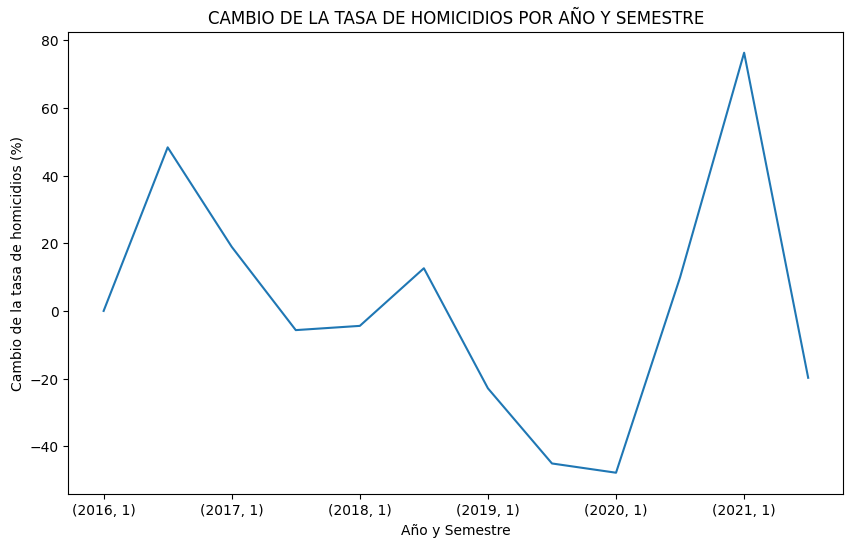

In [7]:
# Agrupar por año y semestre y calcular la media del cambio de la tasa de homicidios
cambio_tasa_homicidios = df_merged.groupby(['AAAA', 'SEMESTRE'])['CAMBIO_TASA_HOMICIDIOS'].mean()
# Crear un gráfico de línea del cambio de la tasa de homicidios
cambio_tasa_homicidios.plot(kind='line', figsize=(10, 6))
# Configurar el título y las etiquetas de los ejes
plt.title('CAMBIO DE LA TASA DE HOMICIDIOS POR AÑO Y SEMESTRE')
plt.xlabel('Año y Semestre')
plt.ylabel('Cambio de la tasa de homicidios (%)')
# Mostrar el gráfico
plt.show()

Análisis Gráfica N° 1:
<p>En la gráfica se observa el promedio de evolución porcentual de la tasa de homicidios por siniestros viales, lo que determina el comportamiento de la tasa de homicidios por siniestros viales a través del tiempo (semestre y año). </p>
<p>Se muestra como tiene una tendencia a la baja lo cual lo respalda los gráficos de numero de vicitmas por semestre y año en el docuemnto EDA.ipynb. Vemos como en los semestres del año 2016 hasta el 2020 hubo una reducción en evolución porcentual de la tasa de homicidios, esto debido a que las medidas tomadas por la parte gubernamental ayudaron.</p>
<p>Vemos como a través del tiempo el KPI cuyo objetivo es reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior, se cumple y no se cumple. El KPI se cumple en semestre 1 y 2 del año 2019, en el semestre 1 y 2 del año 2020 y en el semestre 2 del año 2021.</p>
<p>Por último, cabe resaltar que como el semestre 1 del año 2016 no tiene un periodo anterior con el cual comparar, se realiza el cambio del valor obtenido por el calculo que fue NaN por 0.</p>

In [9]:

df_merged.to_csv('Cambio de Tasa de Homicidios.csv', index=False)

KPI N°2 : Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [10]:
# Filtrar los datos para incluir sólo los accidentes que involucraron una moto
accidentes_moto = df[df['VICTIMA'] == 'Moto']
# Calcular el número de accidentes mortales con víctimas en moto por año
evolucion_accidentes_moto = accidentes_moto.groupby('AAAA')['N_VICTIMAS'].sum()
# Calcular la tasa de accidentes mortales de motociclistas por año
tasa_mortalidad_motos = ((evolucion_accidentes_moto.shift() - evolucion_accidentes_moto)/evolucion_accidentes_moto.shift()) * -100

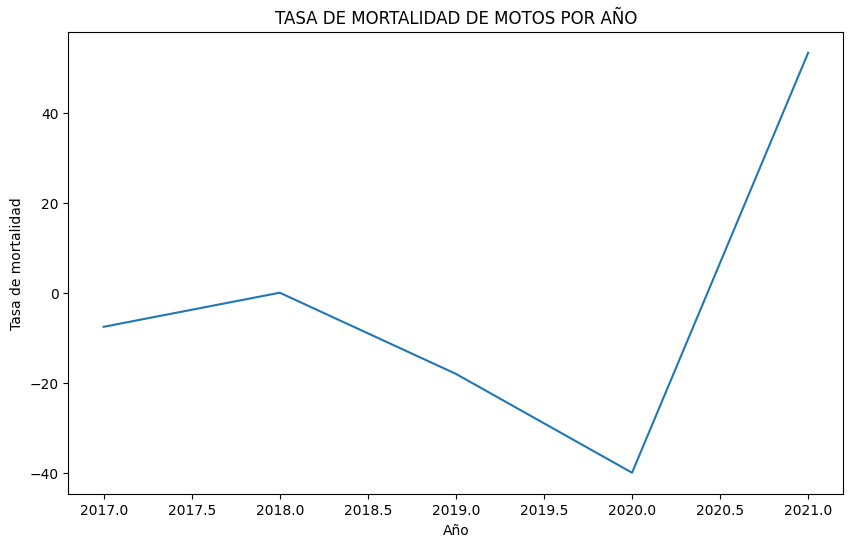

In [11]:
# Crear un gráfico de línea de la tasa de mortalidad de motos
tasa_mortalidad_motos.plot(kind='line', figsize=(10, 6))
# Configurar el título y las etiquetas de los ejes
plt.title('TASA DE MORTALIDAD DE MOTOS POR AÑO')
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.show()

Análisis Gráfica N° 2:
<p>En la gráfica se observa el comportamiento de la tasa de mortalidad de accidentes en las cuales la victima sea un moto a tráves de los años.</p>
<p>El comportamiento de la tasa de mortalidad de motos a través del tiempo tiene una clara tendencia a la baja entre los años 2017 y 2020, en lo cual tuvo incidencia las politicas y medidas establecidas por el ente gubernamental de la Ciudad Autonoma de Buenos Aires, que investigando algunas causas de ellas pudo ser las implementadas para mitigar el impacto y precaución de la Pandemia COVID-19.</p>
<p>En el año 2021 tuvo una clara alza del comportamiento porcentual de la tasa de homicidios de moto aumentando un 53.333%, lo que permite realizar la hipotesis de que esto se debio a la medidas de reincerción economica después de la Pandemia del COVID-19.</p>
<p>Cabe resaltar, que como el año 2016 no tuvo periodo anterior con el cual comparar y así calcular la tasa de mortalidad, el resultado obtenido por el calculo este arrojando NaN fue cambiado por el valor de 0.</p>

In [12]:
new_df = df[['AAAA', 'N_VICTIMAS']].copy()
new_df = evolucion_accidentes_moto.reset_index()
new_df['TASA_MORTALIDAD_MOTOS'] = tasa_mortalidad_motos.values
new_df['TASA_MORTALIDAD_MOTOS'] = new_df['TASA_MORTALIDAD_MOTOS'].fillna(0)
new_df['TASA_MORTALIDAD_MOTOS'] = new_df['TASA_MORTALIDAD_MOTOS'].round(3)
new_df['TASA_MORTALIDAD_MOTOS'] = new_df['TASA_MORTALIDAD_MOTOS'].astype(float)
new_df.to_csv('Tasa Mortalidad Motos.csv', index=False)